In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [52]:
history_path = "postprocess/2941628/history_0.csv"
scale_bounds = np.array(
    [
        [15., 145.],
        [20., 145.],
    ]
)
n_init = 97

In [53]:
df_scaled_inputs = pd.read_csv(history_path, header=[0, 1], index_col=0)
inputs_unscaled = df_scaled_inputs.input.values * (scale_bounds[:, 1] - scale_bounds[:, 0]) + scale_bounds[:, 0]

output_history = df_scaled_inputs.output.values
c_min = np.minimum.accumulate(output_history)

In [54]:
best_indices = np.vstack([False, (c_min[1:] - c_min[:-1]) != 0.])

In [55]:
best_index_values = [i for i in range(len(best_indices)) if best_indices[i]]

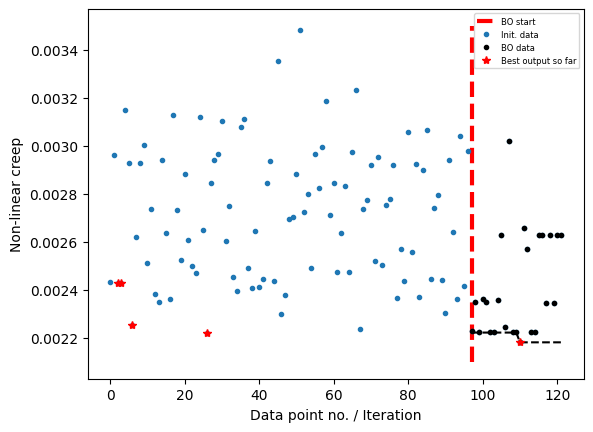

In [65]:
plt.vlines(x=n_init, ymin=0.0021, ymax=0.0035, color='red', linewidth=3, linestyle='--', label='BO start')
plt.plot(output_history, '.', label='Init. data')
plt.plot(range(n_init, n_init + 25), output_history[n_init:], 'k.', label='BO data')
plt.plot(range(n_init, n_init + 25), c_min[n_init:], 'k--')
plt.plot(best_index_values, output_history[best_indices], 'r*', label='Best output so far')

plt.xlabel('Data point no. / Iteration')
plt.ylabel('Non-linear creep')
plt.legend(fontsize=6)

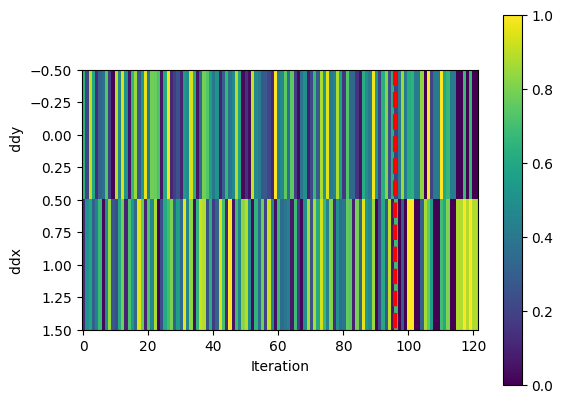

In [68]:
im = plt.imshow(df_scaled_inputs.input.values.T, aspect=40)
plt.vlines(x=n_init - 1, ymin=-0.5, ymax=1.5, color='red', linewidth=3, linestyle='--')
plt.ylabel(
    r'ddx                      ddy')
plt.xlabel('Iteration')
plt.colorbar(im)